# `Deep Learning --> Predicción de intención de compra en comercio Online`

--- 
---
---

# `0 - Librerias`

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import joblib  
import os

# `1 - Carga de datos`

- Aqui cargamos los datos del data set guardados con anterioridad.
- De esta manera nos aseguramos que en data set este diividio exactamente igual que en los modelos de ML.

In [2]:
X_y_shopping_trans = pd.read_csv("../data/processed/shopping_transformado_X_train_y_train_only.csv")

In [3]:

variable_folder = "../data/processed"
variables_filename = os.path.join(variable_folder, "set_datos_transformados_SMOTE.pkl")

loaded_variables = joblib.load(variables_filename)

df_shopping_transformado = loaded_variables['shopping_trans_X_y'] 
X_test = loaded_variables['X_test_trans']
y_test = loaded_variables['y_test']

In [4]:
X_y_shopping_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16676 entries, 0 to 16675
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   num__Administrative                 16676 non-null  float64
 1   num__ProductRelated                 16676 non-null  float64
 2   num__PageValues                     16676 non-null  float64
 3   num__ProductRelated_Duration        16676 non-null  float64
 4   num__BounceRates                    16676 non-null  float64
 5   num__ExitRates                      16676 non-null  float64
 6   cat__Month_Dec                      16676 non-null  float64
 7   cat__Month_Feb                      16676 non-null  float64
 8   cat__Month_Jul                      16676 non-null  float64
 9   cat__Month_June                     16676 non-null  float64
 10  cat__Month_Mar                      16676 non-null  float64
 11  cat__Month_May                      16676

- Target

In [5]:
target = "Revenue"

- Confirmación de que SMOTE esta aplicado a X e y train

In [6]:
X_y_shopping_trans[target].value_counts()

Revenue
0    8338
1    8338
Name: count, dtype: int64

- Los datos de X-train e y_train venian en un solo dataframe, de ahi que nos toque separarlos. 

In [7]:
X_train = X_y_shopping_trans.drop(columns=target, axis=1)
y_train = X_y_shopping_trans[target]

### `Transformación de los datos --> Valores entre -1 y 1`

In [8]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# `2 - Modelado`

### `2.1 - Definición de capas`

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])


c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Estructura del modelo

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 384 (1.50 KB)

### `2.2 - Compilación`

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name='recall')]
)

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name='recall')]
)



### `2.3 - Entrenamiento`

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=100,
    restore_best_weights=True
)

early_stopping_2 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [13]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
834/834 - 2s - 2ms/step - accuracy: 0.7624 - loss: 0.5061 - recall: 0.5394 - val_accuracy: 0.8414 - val_loss: 0.3521 - val_recall: 0.8414
Epoch 2/100
834/834 - 1s - 643us/step - accuracy: 0.8370 - loss: 0.3898 - recall: 0.7793 - val_accuracy: 0.8318 - val_loss: 0.3316 - val_recall: 0.8318
Epoch 3/100
834/834 - 1s - 634us/step - accuracy: 0.8403 - loss: 0.3703 - recall: 0.7775 - val_accuracy: 0.8528 - val_loss: 0.3088 - val_recall: 0.8528
Epoch 4/100
834/834 - 1s - 636us/step - accuracy: 0.8424 - loss: 0.3616 - recall: 0.7867 - val_accuracy: 0.8366 - val_loss: 0.3263 - val_recall: 0.8366
Epoch 5/100
834/834 - 1s - 631us/step - accuracy: 0.8484 - loss: 0.3534 - recall: 0.7841 - val_accuracy: 0.8309 - val_loss: 0.3134 - val_recall: 0.8309
Epoch 6/100
834/834 - 1s - 634us/step - accuracy: 0.8482 - loss: 0.3498 - recall: 0.7887 - val_accuracy: 0.8237 - val_loss: 0.3356 - val_recall: 0.8237
Epoch 7/100
834/834 - 1s - 633us/step - accuracy: 0.8504 - loss: 0.3399 - recall: 0.7859 -

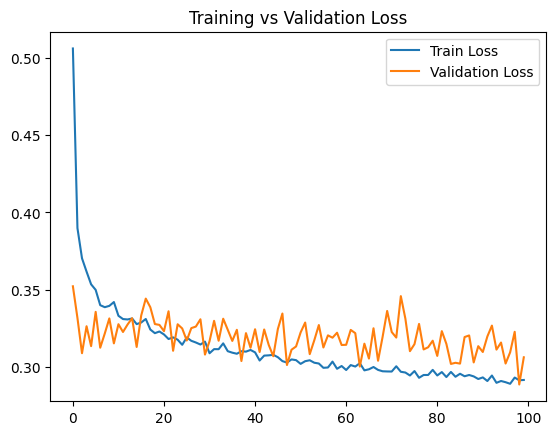

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

Epoch 1/100
834/834 - 1s - 2ms/step - accuracy: 0.7612 - loss: 0.4921 - recall: 0.7033 - val_accuracy: 0.8195 - val_loss: 0.4119 - val_recall: 0.8195
Epoch 2/100
834/834 - 1s - 631us/step - accuracy: 0.8313 - loss: 0.3939 - recall: 0.7809 - val_accuracy: 0.8186 - val_loss: 0.3847 - val_recall: 0.8186
Epoch 3/100
834/834 - 1s - 632us/step - accuracy: 0.8363 - loss: 0.3774 - recall: 0.7855 - val_accuracy: 0.8144 - val_loss: 0.3616 - val_recall: 0.8144
Epoch 4/100
834/834 - 1s - 631us/step - accuracy: 0.8427 - loss: 0.3639 - recall: 0.7989 - val_accuracy: 0.8168 - val_loss: 0.3763 - val_recall: 0.8168
Epoch 5/100
834/834 - 1s - 623us/step - accuracy: 0.8463 - loss: 0.3502 - recall: 0.7973 - val_accuracy: 0.8234 - val_loss: 0.3833 - val_recall: 0.8234
Epoch 6/100
834/834 - 1s - 627us/step - accuracy: 0.8458 - loss: 0.3530 - recall: 0.7903 - val_accuracy: 0.8177 - val_loss: 0.3561 - val_recall: 0.8177
Epoch 7/100
834/834 - 1s - 635us/step - accuracy: 0.8524 - loss: 0.3449 - recall: 0.8005 -

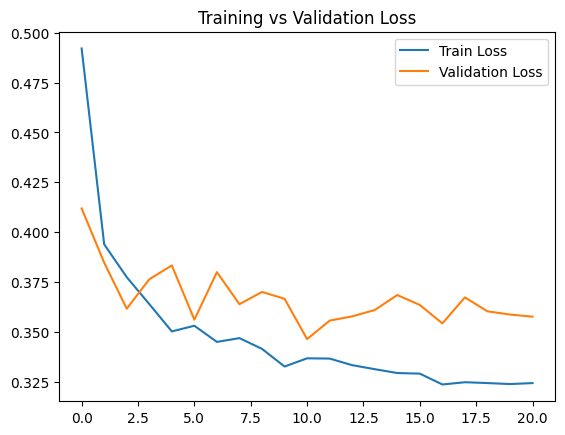

In [15]:
history_2 = model_2.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping_2],
    verbose=2
)

import matplotlib.pyplot as plt

plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

### `2.4 - Evaluación gráfica`

Loss: 0.2913, Accuracy: 0.8589, Recall: 0.8272
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step

Classification Report:
              precision    recall  f1-score   support

   No Compra       0.96      0.86      0.91      2084
      Compra       0.53      0.83      0.64       382

    accuracy                           0.86      2466
   macro avg       0.75      0.85      0.78      2466
weighted avg       0.90      0.86      0.87      2466



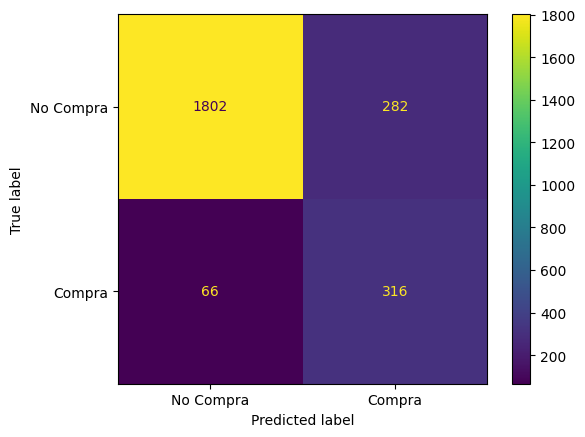

In [16]:
# Evaluar en el conjunto de prueba
results = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {results[0]:.4f}, Accuracy: {results[1]:.4f}, Recall: {results[2]:.4f}")

# Realizar predicciones
y_pred_proba = model.predict(X_test_scaled)  
y_pred = (y_pred_proba >= 0.5).astype(int)


# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=["No Compra", "Compra"]).plot()

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Compra", "Compra"]))



- Aqui evaluamos con un early_stopping de patiente 10, porque no queremos caer en el overfitting.
- Vemos que los resultados varian poco respecto del caso anterior (dejando que haga todas las epocas).
- Se ve en el caso anterior como la perdida en validacion tiene muchos repuntes, por lo que nos dice que esta entrando en overfitiing.

Loss: 0.2956, Accuracy: 0.8727, Recall: 0.7932
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step

Classification Report:
              precision    recall  f1-score   support

   No Compra       0.96      0.89      0.92      2084
      Compra       0.56      0.79      0.66       382

    accuracy                           0.87      2466
   macro avg       0.76      0.84      0.79      2466
weighted avg       0.90      0.87      0.88      2466



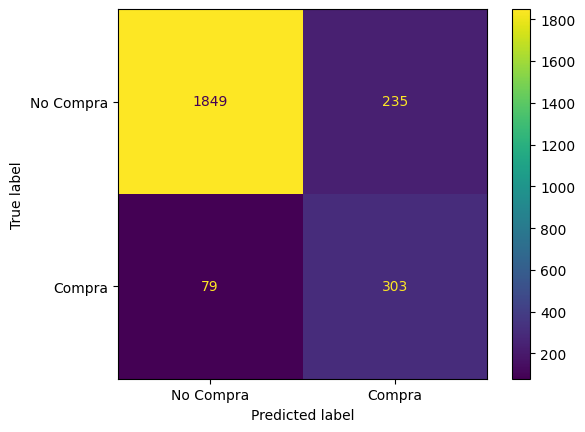

In [17]:
# Evaluar en el conjunto de prueba
results = model_2.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {results[0]:.4f}, Accuracy: {results[1]:.4f}, Recall: {results[2]:.4f}")

# Realizar predicciones
y_pred_proba_2 = model_2.predict(X_test_scaled)  
y_pred_2 = (y_pred_proba_2 >= 0.5).astype(int)


# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_2)
ConfusionMatrixDisplay(conf_matrix, display_labels=["No Compra", "Compra"]).plot()

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_2, target_names=["No Compra", "Compra"]))

### `2.5 - Guardar modelo`

In [18]:
model_2.save('../model/Deep_Learning_model/shopping_DL.keras')